<a href="https://colab.research.google.com/github/BrianHall1992/LAGCC-Project-3/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I had issues loading the dataset from the World Bank from my laptop to colab, so found it was easier to put it onto Google sheets and research how to connect the two services

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Opens the worksheet from Google sheets, gets the values from that sheet, displays the head to see any issues. First off, the column headers are treated as the first row, so I need to fix that

In [2]:
worksheet=gc.open('WDBI').get_worksheet(0)
rows=worksheet.get_all_values()
df=pd.DataFrame.from_records(rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD....,Domestic general government health expenditure...,Domestic general government health expenditure...,Domestic general government health expenditure...,Domestic private health expenditure (% of curr...,External health expenditure (% of current heal...,Military expenditure (% of GDP) [MS.MIL.XPND.G...,Military expenditure (% of general government ...,Out-of-pocket expenditure (% of current health...,Risk of catastrophic expenditure for surgical ...,Risk of impoverishing expenditure for surgical...,"Life expectancy at birth, total (years) [SP.DY...","Life expectancy at birth, male (years) [SP.DYN...","Life expectancy at birth, female (years) [SP.D..."
1,1996,YR1996,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,53.924,52.798,55.141
2,1996,YR1996,Albania,ALB,..,..,..,..,..,..,1.379029627,..,..,..,..,72.495,69.631,75.618
3,1996,YR1996,Algeria,DZA,..,..,..,..,..,..,3.094088396,10.97405635,..,..,..,68.919,67.441,70.441
4,1996,YR1996,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..


Here I correct the colmn heads by creating a list of the column names, removing them from the dataframe, and then adjusting that new dataframe with the column names correctly. I go back to inspecting the data

In [3]:
new_header = df.iloc[0]
df=df[1:]
df.columns=new_header
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS],Domestic private health expenditure (% of current health expenditure) [SH.XPD.PVTD.CH.ZS],External health expenditure (% of current health expenditure) [SH.XPD.EHEX.CH.ZS],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS],Out-of-pocket expenditure (% of current health expenditure) [SH.XPD.OOPC.CH.ZS],Risk of catastrophic expenditure for surgical care (% of people at risk) [SH.SGR.CRSK.ZS],Risk of impoverishing expenditure for surgical care (% of people at risk) [SH.SGR.IRSK.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]","Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]"
1,1996,YR1996,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,53.924,52.798,55.141
2,1996,YR1996,Albania,ALB,..,..,..,..,..,..,1.379029627,..,..,..,..,72.495,69.631,75.618
3,1996,YR1996,Algeria,DZA,..,..,..,..,..,..,3.094088396,10.97405635,..,..,..,68.919,67.441,70.441
4,1996,YR1996,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..
5,1996,YR1996,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..


While the column names are now correct, since there are many with long names I'll call them for reference, and then know how to rename them to remove the series codes.Next, I replace all the '..'s with NaN from numpy so I can perform operations on the dataset

In [5]:
df.columns


Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS]',
       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
       'Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS]',
       'Domestic private health expenditure (% of current health expenditure) [SH.XPD.PVTD.CH.ZS]',
       'External health expenditure (% of current health expenditure) [SH.XPD.EHEX.CH.ZS]',
       'Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]',
       'Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS]',
       'Out-of-pocket expenditure (% of current health expenditure) [SH.XPD.OOPC.CH.ZS]',
       'Risk of catastrophic expenditure for surgical care (% of people at risk) [SH.SGR.CRSK.ZS]',
       'Risk of impoverishin

In [4]:
df.rename(columns={'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]': 'Current health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS]':'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]':'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS]':'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic private health expenditure (% of current health expenditure) [SH.XPD.PVTD.CH.ZS]':'Domestic private health expenditure (% of current health expenditure)',
       'External health expenditure (% of current health expenditure) [SH.XPD.EHEX.CH.ZS]':'External health expenditure (% of current health expenditure)',
       'Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]':'Military expenditure (% of GDP)',
       'Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS]':'Military expenditure (% of general government expenditure)',
       'Out-of-pocket expenditure (% of current health expenditure) [SH.XPD.OOPC.CH.ZS]':'Out-of-pocket expenditure (% of current health expenditure)',
       'Risk of catastrophic expenditure for surgical care (% of people at risk) [SH.SGR.CRSK.ZS]':'Risk of catastrophic expenditure for surgical care (% of people at risk)',
       'Risk of impoverishing expenditure for surgical care (% of people at risk) [SH.SGR.IRSK.ZS]':'Risk of impoverishing expenditure for surgical care (% of people at risk)',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life expectancy at birth, total (years)',
       'Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]':'Life expectancy at birth, male (years)',
       'Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]':'Life expectancy at birth, female (years)'},inplace=True)
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of general government expenditure),Domestic private health expenditure (% of current health expenditure),External health expenditure (% of current health expenditure),Military expenditure (% of GDP),Military expenditure (% of general government expenditure),Out-of-pocket expenditure (% of current health expenditure),Risk of catastrophic expenditure for surgical care (% of people at risk),Risk of impoverishing expenditure for surgical care (% of people at risk),"Life expectancy at birth, total (years)","Life expectancy at birth, male (years)","Life expectancy at birth, female (years)"
1,1996,YR1996,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,53.924,52.798,55.141
2,1996,YR1996,Albania,ALB,..,..,..,..,..,..,1.379029627,..,..,..,..,72.495,69.631,75.618
3,1996,YR1996,Algeria,DZA,..,..,..,..,..,..,3.094088396,10.97405635,..,..,..,68.919,67.441,70.441
4,1996,YR1996,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..
5,1996,YR1996,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [5]:
df1=df.replace("..",np.NaN)
df1.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of general government expenditure),Domestic private health expenditure (% of current health expenditure),External health expenditure (% of current health expenditure),Military expenditure (% of GDP),Military expenditure (% of general government expenditure),Out-of-pocket expenditure (% of current health expenditure),Risk of catastrophic expenditure for surgical care (% of people at risk),Risk of impoverishing expenditure for surgical care (% of people at risk),"Life expectancy at birth, total (years)","Life expectancy at birth, male (years)","Life expectancy at birth, female (years)"
1,1996,YR1996,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.924,52.798,55.141
2,1996,YR1996,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,1.379029627,NaN,NaN,NaN,NaN,72.495,69.631,75.618
3,1996,YR1996,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,3.094088396,10.97405635,NaN,NaN,NaN,68.919,67.441,70.441
4,1996,YR1996,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996,YR1996,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the missing values corrected, I remove the odd columns, getting rid of everything without a country name, and then create a list of non-country names so I can subset more easily within countries

In [6]:
df2=df1[df1['Country Name'] != '']
df2.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of general government expenditure),Domestic private health expenditure (% of current health expenditure),External health expenditure (% of current health expenditure),Military expenditure (% of GDP),Military expenditure (% of general government expenditure),Out-of-pocket expenditure (% of current health expenditure),Risk of catastrophic expenditure for surgical care (% of people at risk),Risk of impoverishing expenditure for surgical care (% of people at risk),"Life expectancy at birth, total (years)","Life expectancy at birth, male (years)","Life expectancy at birth, female (years)"
1,1996,YR1996,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.924,52.798,55.141
2,1996,YR1996,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,1.379029627,NaN,NaN,NaN,NaN,72.495,69.631,75.618
3,1996,YR1996,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,3.094088396,10.97405635,NaN,NaN,NaN,68.919,67.441,70.441
4,1996,YR1996,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996,YR1996,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2['Country Name'].unique()
regions=['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle income', 'North America', 'Not classified', 'OECD members',
       'Other small states', 'Pacific island small states',
       'Post-demographic dividend', 'Pre-demographic dividend',
       'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World']

Looking at how global life expectancy changes year over year, I need to do a little bit of cleaning (ensure the years are datetime, life expctancy is numeric) and chose a scatterplot instead of line because I like the way the notches look to more clearly show each individual year

Text(0.5, 1.0, 'Global Average Life Expectancy Year Over Year')

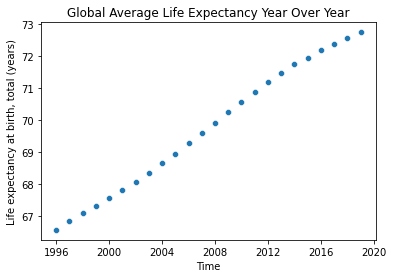

In [10]:
df_world = df2[df2['Country Name']=='World']
df_world = df_world[pd.notnull(df_world['Life expectancy at birth, total (years)'])]
df_world['Life expectancy at birth, total (years)'] = pd.to_numeric(df_world['Life expectancy at birth, total (years)'])
df_world['Time'] = pd.to_datetime(df_world['Time'],format='%Y')
sns.scatterplot( data = df_world,x='Time', y='Life expectancy at birth, total (years)')
plt.title('Global Average Life Expectancy Year Over Year')
##Clean it up


I'm curious about figuring out the top and bottom 10 countries life expectancies, and then plotting them similarly.

In [11]:
df_countries = df2[~df2['Country Name'].isin(regions)]
df_countries = df_countries[pd.notnull(df_countries['Life expectancy at birth, total (years)'])]
df_countries['Life expectancy at birth, total (years)'] = pd.to_numeric(df_countries['Life expectancy at birth, total (years)'])
df_countries['Time'] = pd.to_datetime(df_countries['Time'],format='%Y')
df_countries.groupby(['Country Name'])['Life expectancy at birth, total (years)'].mean().sort_values(ascending=False)
##df_countries.groupby(['Country Name','Time'])['Life expectancy at birth, total (years)'].mean()
df_top = df_countries.groupby(['Country Name'])['Life expectancy at birth, total (years)'].mean().sort_values(ascending=False).head(10).reset_index()
df_bottom = df_countries.groupby(['Country Name'])['Life expectancy at birth, total (years)'].mean().sort_values(ascending=False).tail(10).reset_index()
df_tc= df_countries[df['Country Name'].isin(df_top['Country Name'])]
df_bc= df_countries[df['Country Name'].isin(df_bottom['Country Name'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Countries With Top 10 Life Expectancy Over Time')

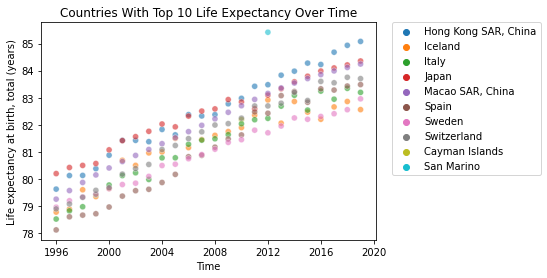

In [12]:
sns.scatterplot(data=df_tc, x='Time', y='Life expectancy at birth, total (years)', hue='Country Name', alpha = .6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Countries With Top 10 Life Expectancy Over Time')
##Clean Up, make title, make dots see through, plot the gender versions, look at what's going on with San Marino?

Text(0.5, 1.0, 'Countries With Bottom 10 Life Expectancy Over Time')

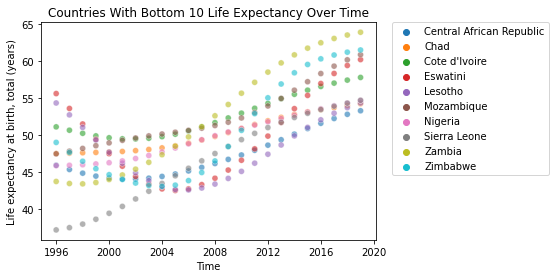

In [13]:
sns.scatterplot(data=df_bc, x='Time', y='Life expectancy at birth, total (years)', hue='Country Name',alpha = .6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Countries With Bottom 10 Life Expectancy Over Time')
##Clean Up

San Marino is such a weird outlier on these two graphs that I want to focus exclusively on them, and I'll do a more concise write up of this tomorrow.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

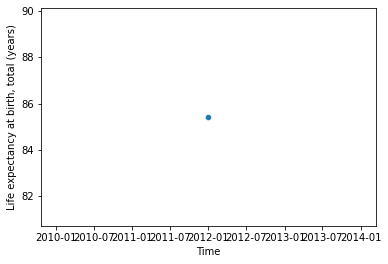

In [16]:
df_sm = df_tc[df_tc['Country Name']=='San Marino']
df_sm['Life expectancy at birth, male (years)'] = pd.to_numeric(df_countries['Life expectancy at birth, male (years)'])
df_sm['Life expectancy at birth, female (years)'] = pd.to_numeric(df_countries['Life expectancy at birth, male (years)'])
df_sm['Time'] = pd.to_datetime(df_sm['Time'],format='%Y')
sns.scatterplot(data=df_sm, x='Time', y ='Life expectancy at birth, total (years)')
##sns.scatterplot(data=df_sm, x='Time', y ='Life expectancy at birth, female (years)')

So what I've learned is that San Marino only has one year of data, 2012, which is why its' average life expectancy is so much higher. Mystery solved, and in all future considerations they will be excluded.